```

sudo su
pip install autopep8 flake8

exit


apm install atom-beautify autocomplete-python linter linter-flake8

```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

%matplotlib inline

In [11]:
!head u.user

1|24|M|technician|85711
2|53|F|other|94043
3|23|M|writer|32067
4|24|M|technician|43537
5|33|F|other|15213
6|42|M|executive|98101
7|57|M|administrator|91344
8|36|M|administrator|05201
9|29|M|student|01002
10|53|M|lawyer|90703


In [12]:
user_header = 'user id | age | gender | occupation | zip code'

user_cols = user_header.replace(' ', '_').split('_|_')

users = pd.read_csv('u.user', sep='|', names=user_cols)

In [13]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [17]:
!head u.item

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0
6|Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|01-Jan-1995||http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
7|Twelve Monkeys (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|1|0|0|0
8|Babe (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Babe%20(1995)|0|0|0|0|1

In [19]:
!uchardet u.item

windows-1252


In [20]:
movies_header = "movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Childrens | Comedy | Crime | Documentary | Drama | Fantasy | FilmNoir | Horror | Musical | Mystery | Romance | SciFi | Thriller | War | Western"



movie_cols = movies_header.replace(' ', '_').lower().split('_|_')

movies = pd.read_csv('u.item', sep='|', names=movie_cols, encoding='windows-1252')

# specify only certain cols to read in
# movies = pd.read_csv('u.item', sep='|', names=movie_cols, encoding='windows-1252', usecols=(5))


In [21]:
movies.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,...,fantasy,filmnoir,horror,musical,mystery,romance,scifi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
!head u.data

196	242	3	881250949
186	302	3	891717742
22	377	1	878887116
244	51	2	880606923
166	346	1	886397596
298	474	4	884182806
115	265	2	881171488
253	465	5	891628467
305	451	3	886324817
6	86	3	883603013


In [27]:
ratings_header = 'user id | movie id | rating | timestamp'
# changed item id to movie id for consistency

ratings_cols = ratings_header.replace(' ', '_').lower().split('_|_')

ratings = pd.read_csv('u.data', sep='\t', names=ratings_cols)


In [28]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [37]:
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,...,musical,mystery,romance,scifi,thriller,war,western,user_id,rating,timestamp
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,308,4,887736532
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,287,5,875334088
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,148,4,877019411
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,280,4,891700426
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,66,3,883601324


In [30]:
len(movies)

1682

In [31]:
len(movie_ratings)

100000

In [38]:
movielens = pd.merge(pd.merge(movies, ratings), users)

In [39]:
movielens.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,...,thriller,war,western,user_id,rating,timestamp,age,gender,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,1,0,0,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,308,5,887736696,60,M,retired,95076


In [55]:
most_rated = movielens.groupby('movie_title')
new_series = most_rated.size()
new_series.order(ascending=False)[:25]

movie_title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to 

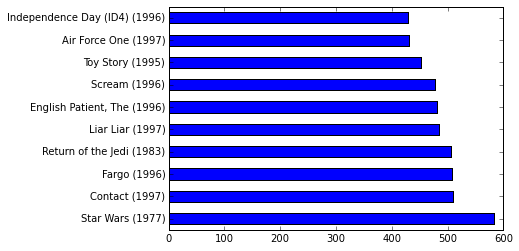

In [61]:
movielens.movie_title.value_counts()[:10].plot(kind='barh')

# groupby

groupby objects give us some new methods

an interesting one is `agg()` (aggregating)

In [84]:
top_movies = movielens.groupby('movie_title') \
    .agg({'rating': [np.mean, np.size]}) #\
#    .sort([('rating', 'mean')], ascending=False)

In [100]:
atleast_25 = top_movies['rating']['size'] >= 25
atleast_25
# top_movies.sort([('rating', 'mean')], ascending=False)

# movielens[atleast_25].head()
top_movies[atleast_25].sort(('rating', 'mean'), ascending=False)

rating     
                                                        mean size
movie_title                                                      
Close Shave, A (1995)                               4.491071  112
Schindler's List (1993)                             4.466443  298
Wrong Trousers, The (1993)                          4.466102  118
Casablanca (1942)                                   4.456790  243
Wallace & Gromit: The Best of Aardman Animation...  4.447761   67
Shawshank Redemption, The (1994)                    4.445230  283
Rear Window (1954)                                  4.387560  209
Usual Suspects, The (1995)                          4.385768  267
Star Wars (1977)                                    4.358491  583
12 Angry Men (1957)                                 4.344000  125
Third Man, The (1949)                               4.333333   72
Citizen Kane (1941)                                 4.292929  198
Some Folks Call It a Sling Blade (1993)             4.292683   41
To Kill a Mockingbird (1962)                        4.292237  219
One Flew Over the Cuckoo's Nest (1975)              4.291667  264
Silence of the Lambs, The (1991)                    4.289744  390
North by Northwest (1959)                           4.284916  179
Godfather, The (1972)                               4.283293  413
Secrets & Lies (1996)                               4.265432  162
Good Will Hunting (1997)                            4.262626  198
Shall We Dance? (1996)                              4.260870   46
Manchurian Candidate, The (1962)                    4.259542  131
Dr. Strangelove or: How I Learned to Stop Worry...  4.252577  194
Raiders of the Lost Ark (1981)                      4.252381  420
Vertigo (1958)                                      4.251397  179
Titanic (1997)                                      4.245714  350
Lawrence of Arabia (1962)                           4.231214  173
Paths of Glory (1957)                               4.212121   33
Maltese Falcon, The (1941)                          4.210145  138
Empire Strikes Back, The (1980)                     4.204360  367
...                                                      ...  ...
Sliver (1993)                                       2.405405   37
Vegas Vacation (1997)                               2.400000   75
Very Brady Sequel, A (1996)                         2.397849   93
Star Trek V: The Final Frontier (1989)              2.396825   63
Beverly Hills Cop III (1994)                        2.392857   28
Airheads (1994)                                     2.343750   32
Cable Guy, The (1996)                               2.339623  106
Beautician and the Beast, The (1997)                2.313953   86
Beverly Hills Ninja (1997)                          2.312500   48
Anaconda (1997)                                     2.289474   38
Dracula: Dead and Loving It (1995)                  2.280000   25
Joe's Apartment (1996)                              2.244444   45
Keys to Tulsa (1997)                                2.240000   25
Striptease (1996)                                   2.238806   67
Coneheads (1993)                                    2.219512   41
Halloween: The Curse of Michael Myers (1995)        2.200000   25
McHale's Navy (1997)                                2.188406   69
Booty Call (1997)                                   2.166667   48
Island of Dr. Moreau, The (1996)                    2.157895   57
Speed 2: Cruise Control (1997)                      2.131579   38
Spice World (1997)                                  2.115385   26
Super Mario Bros. (1993)                            2.076923   26
Flintstones, The (1994)                             2.064516   31
Tales from the Hood (1995)                          2.037037   27
Mortal Kombat: Annihilation (1997)                  1.953488   43
Crow: City of Angels, The (1996)                    1.948718   39
Barb Wire (1996)                                    1.933333   30
Bio-Dome (1996)             

In [67]:
agg = movie_groups.

In [70]:
agg.sort('rating', ascending=False)

,rating
movie_title,
They Made Me a Criminal (1939),5.000000
Marlene Dietrich: Shadow and Light (1996),5.000000
"Saint of Fort Washington, The (1993)",5.000000
Someone Else's America (1995),5.000000
Star Kid (1997),5.000000
"Great Day in Harlem, A (1994)",5.000000
Aiqing wansui (1994),5.000000
Santa with Muscles (1996),5.000000
Prefontaine (1997),5.000000


In [92]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


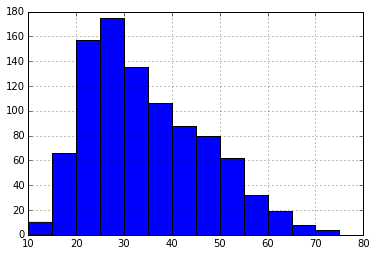

In [99]:
users.age.hist(bins=range(10,80,5))